In [191]:
import numpy as np
import matplotlib.pyplot as plt
import mylib as my
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
%matplotlib inline
# pixelscale 55e-3 for orange / 0.125 for lemon
pixelscale = 0.125 
x_resolution = y_resolution = 2048

# Load File

In [192]:
########## LOAD FILE 
fname = 'clustering_run813_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'
data = np.loadtxt(("./data/%s" % fname), 
                    delimiter=" ")
#
# iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)
# ddx (10), ddy(11), x0start(12), y0start(13), x0end(14), y0end (15)

In [193]:
########## LOAD FILE 
fname = 'clustering_run831_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'
dataFe = np.loadtxt(("./data/%s" % fname), 
                    delimiter=" ")
#
# iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)
# ddx (10), ddy(11), x0start(12), y0start(13), x0end(14), y0end (15)

# photon spectra

/opt/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in divide


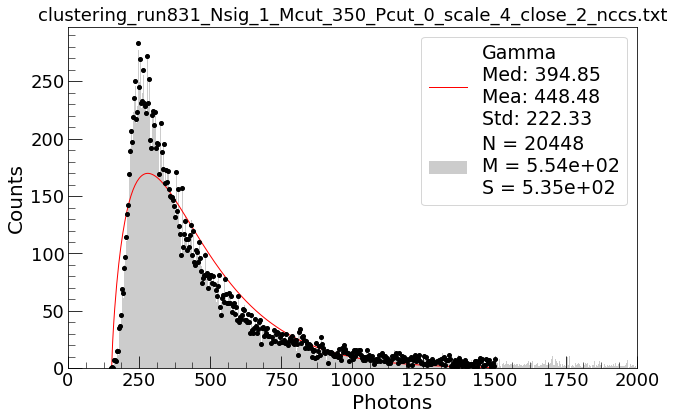

In [194]:
my.set_atlas_style()
y        = np.array(data[:,2]-data[:,3])
sx       = np.array(data[:,7])
sy       = np.array(data[:,9])
pixel    = np.array(data[:,4])
#y        = y[(sx>0.2) & (sx<0.5) & (sy>0.2) & (sy<0.5)]
#y         = y[y<10000]
y         = y[(pixel>30) & (pixel<300)] # 40 deciso da Davide
#y         = y[(sx>5) & (sy>5)]
#y         = y[(pixel>400) & (pixel<850)]
bin_size = 10
bins     = int(y.size/bin_size)

plt.hist(y, bins=bins, color='gray', alpha=0.4,
            label='N = %d\nM = %.2e\nS = %.2e' % 
            (y.size, y.mean(), y.std()))

gauss = False
polya = True


if gauss:
    try:
        cmin    = 0
        cmax    = 300
        
        binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
        yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
        sum_yh   = float(sum(yh))
        x       = np.linspace(cmin, cmax, binf)
        ye      = 1/np.sqrt(yh)
        plt.errorbar(x, yh, ye, fmt="k.")
        A, M, S = yh.max(), y.mean(), y.std()
        if gauss:
            popt, pcov = curve_fit(my.Gauss3, x, yh, 
                                  sigma=ye,
                                  absolute_sigma=True,
                                  p0=(A, M, S))
            xf = np.linspace(cmin, cmax, 100)
            plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (popt[0], popt[1], popt[2]))
    except:
        print("Gauss fit error")
if polya:
    try:
        cmin    = 150 # 5000
        cmax    = 1500 #15000
        binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
        x       = np.linspace(cmin, cmax, binf)
        yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
        sum_yh   = float(sum(yh))
        ye      = 1/np.sqrt(yh)
        plt.errorbar(x, yh, ye, fmt="k.")
        if polya:
            alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y[(y>cmin) & (y<cmax)])  
            pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
            plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'r-', 
                     label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                    (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                     stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                     stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))
    except:
        print("Gamma fit error")

if gauss and polya:
    dist = stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma)-popt[1]
    print (dist, stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma/dist))
#plt.xlim(0, 20000) # ORANGE
plt.xlim(0, 2000)
#plt.ylim(0, 200)
plt.xlabel(r'Photons', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.title(fname)
plt.minorticks_on()
plt.legend()
plt.show()

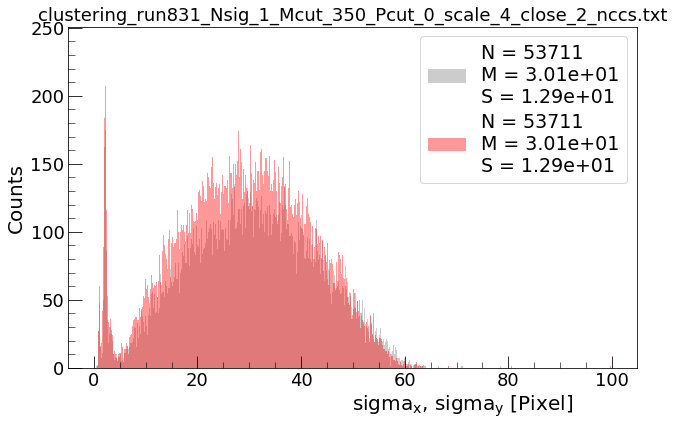

In [195]:
my.set_atlas_style()
#iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)

y        = np.array(data[:,7])
y1        = np.array(data[:,9])
################# CUTS
y=y[y<1000]
y1=y1[y1<1000]
#################
bin_size = 50
bins     = int(y.size/bin_size)

plt.hist(y, bins=bins, color='gray', alpha=0.4,
            label='N = %d\nM = %.2e\nS = %.2e' % 
            (y.size, y.mean(), y.std()))

plt.hist(y1, bins=bins, color='red', alpha=0.4,
            label='N = %d\nM = %.2e\nS = %.2e' % 
            (y.size, y.mean(), y.std()))
#try:
#    cmin    = 0.2
#    cmax    = 0.5
#    
#    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
#    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
#    sum_yh   = float(sum(yh))
#    x       = np.linspace(cmin, cmax, binf)
#    ye      = 1/np.sqrt(yh)
#    plt.errorbar(x, yh, ye, fmt="k.")
#    A, M, S = yh.max(), y.mean(), y.std()
#    popt, pcov = curve_fit(my.Gauss3, x, yh, 
#                          sigma=ye,
#                          absolute_sigma=True,
#                          p0=(A, M, S))
#    xf = np.linspace(cmin, cmax, 100)
#    plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='A = %.2e\nM = %.2e\nS = %.2e' % 
#                          (popt[0], popt[1], popt[2]))
#except:
#    print (">>> fit error")

#try:
#    cmin    = 40
#    cmax    = 160
#    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
#    x       = np.linspace(cmin, cmax, binf)
#    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
#    sum_yh   = float(sum(yh))
#    ye      = 1/np.sqrt(yh)
#    plt.errorbar(x, yh, ye, fmt="k.")
#    if polya:
#        alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y[(y>cmin) & (y<cmax)])  
#        pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
#        plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'r-', 
#                 label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
#                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
#                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
#                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))
#except:
#    print ("Gamma fit error")
#plt.xlim(0, 2000)
plt.title(fname)
plt.minorticks_on()
plt.xlabel(r'$sigma_x$, $sigma_y$ [Pixel]', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.legend()
plt.show()


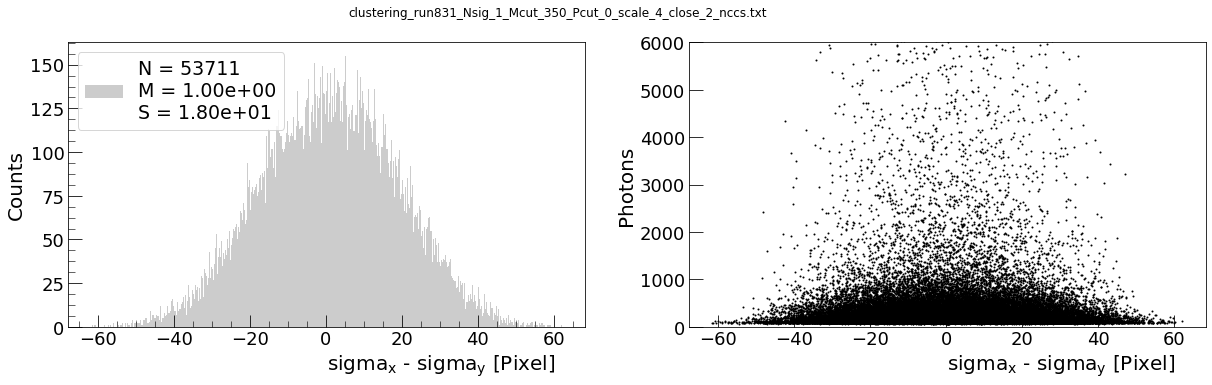

In [196]:
my.set_atlas_style('long')
#iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)
sy0       = np.array(data[:,9])
sx0       = np.array(data[:,7])
l         = np.array(data[:,2])
b         = np.array(data[:,3])
p         = np.array(data[:,4])

################# CUTS
sy=sy0[(sy0<1000) & (sx0<1000)]
sx=sx0[(sx0<1000) & (sy0<1000)]
l=   l[(sy0<1000) & (sx0<1000)]
b=   b[(sy0<1000) & (sx0<1000)]
p=   p[(sy0<1000) & (sx0<1000)]
#################


y = sx - sy
bin_size = 50
bins     = int(y.size/bin_size)

fig, ax = plt.subplots(1,2)
ax[0].hist(y, bins=bins, color='gray', alpha=0.4,
            label='N = %d\nM = %.2e\nS = %.2e' % 
            (y.size, y.mean(), y.std()))
#try:
#    cmin    = -50.
#    cmax    = 50.
#    
#    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
#    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
#    sum_yh   = float(sum(yh))
#    x       = np.linspace(cmin, cmax, binf)
#    ye      = 1/np.sqrt(yh)
#    ax[0].errorbar(x, yh, ye, fmt="k.")
#    A, M, S = yh.max(), y.mean(), y.std()
#    popt, pcov = curve_fit(my.Gauss3, x, yh, 
#                          sigma=ye,
#                          absolute_sigma=True,
#                          p0=(A, M, S))
#    xf = np.linspace(cmin, cmax, 100)
#    ax[0].plot(xf, my.Gauss3(xf, *popt), 'k-', label='A = %.2e\nM = %.2e\nS = %.2e' % 
#                          (popt[0], popt[1], popt[2]))
#except:
#    print (">>> fit error")
ax[1].plot(y, l-b, 'k.', markersize=2)
fig.suptitle(fname, y=1.05)
ax[0].minorticks_on()
#ax[0].set_xlim(-10,10)
ax[0].set_xlabel(r'$sigma_x$ - $sigma_y$ [Pixel]', horizontalalignment = 'left')
ax[0].set_ylabel(r'Counts')
ax[1].set_xlabel(r'$sigma_x$ - $sigma_y$ [Pixel]', horizontalalignment = 'left')
ax[1].set_ylabel(r'Photons')
ax[1].set_ylim(0,6000)
ax[0].legend()
plt.show()


# pixel distribution

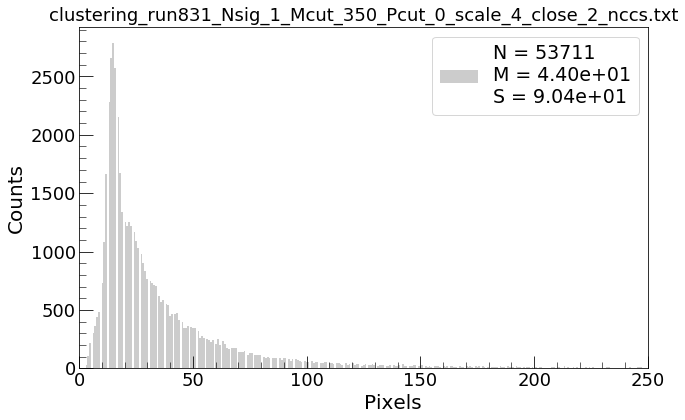

In [197]:
my.set_atlas_style()
#iTr, TrOk, SumLight, SumBck, SumPixel, pClose, x0m, x0s, y0m, y0s
y        = np.array(data[:,4])
#y        = y[(sx>0.5) & (sx<1.5) & (sy>0.5) & (sy<1.5)]
gauss = False
polya = False
bin_size = 10
bins = int(y.size/bin_size)
plt.hist(y, bins=bins, color='gray', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
if gauss or polya:
    try:
        cmin    = 400
        cmax    = 850
        
        binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
        yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
        sum_yh   = float(sum(yh))
        x       = np.linspace(cmin, cmax, binf)
        ye      = 1/np.sqrt(yh)
        plt.errorbar(x, yh, ye, fmt="k.")
        A, M, S = yh.max(), y.mean(), y.std()
        if gauss:
            popt, pcov = curve_fit(my.Gauss3, x, yh, 
                                  sigma=ye,
                                  absolute_sigma=True,
                                  p0=(A, M, S))
            xf = np.linspace(cmin, cmax, 100)
            plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='A = %.2e\nM = %.2e\nS = %.2e' % 
                          (popt[0], popt[1], popt[2]))
    except:
        print("Gauus fit etrror")
    if polya:
        alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y[(y>cmin) & (y<cmax)])  
        pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
        plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'k-', 
                 label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))


#plt.yscale('log')
plt.xlim((0, 250))
#plt.ylim((0, 300))
plt.xlabel(r'Pixels', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.title(fname)
plt.minorticks_on()
plt.legend()
plt.show()

# cluster size

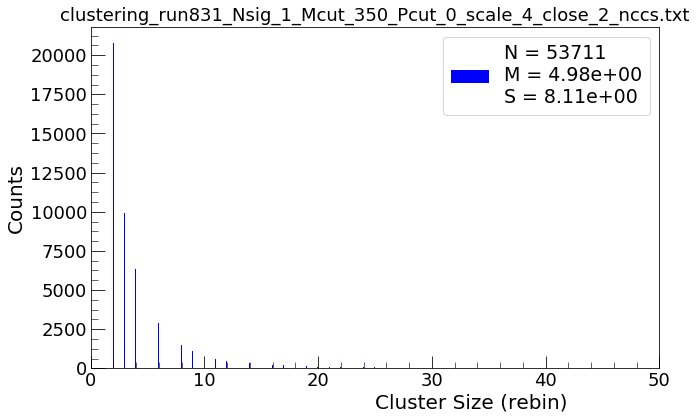

In [198]:
my.set_atlas_style()
#iTr, TrOk, SumLight, SumBck, SumPixel, pClose, x0m, x0s, y0m, y0s
y        = np.array(data[:,5])
#y        = y[(sx>0.5) & (sx<1.5) & (sy>0.5) & (sy<1.5)]
#y        = y[y<30] #WARNING#
gauss = False
polya = False
bin_size = 10
bins = int(y.size/bin_size)
plt.hist(y, bins=bins, color='blue', alpha=1.0, 
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
if gauss or polya:
    cmin    = 7
    cmax    = 20
    
    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
#    plt.errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()
    if gauss:
        popt, pcov = curve_fit(my.Gauss3, x, yh, 
                              sigma=ye,
                              absolute_sigma=True,
                              p0=(A, M, S))
        xf = np.linspace(cmin, cmax, 100)
        plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='A = %.2e\nM = %.2e\nS = %.2e' % 
                      (popt[0], popt[1], popt[2]))
    if polya:
        alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y[(y>cmin) & (y<cmax)])  
        pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
        plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'k-', 
                 label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))


#plt.yscale('log')
plt.xlim((0, 50))
#plt.ylim((0, 100))
plt.xlabel(r'Cluster Size (rebin)', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.minorticks_on()
plt.title(fname)
plt.legend()
plt.show()

# light per pixel

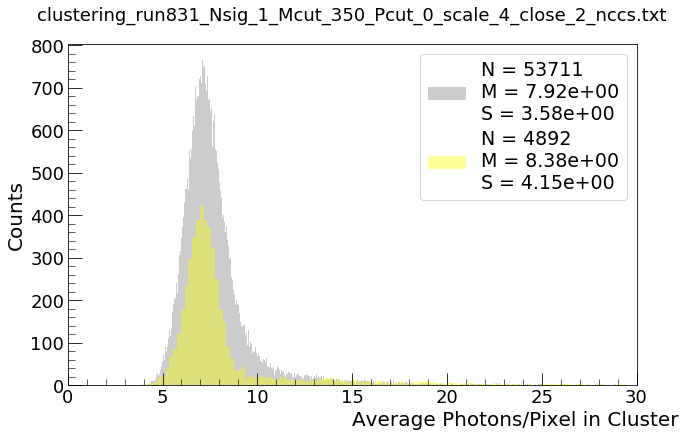

In [199]:
my.set_atlas_style()
# iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)
# dsx (10), dsy (11), dex (12), dey (13)

y        = (np.array(data[:,2])-np.array(data[:,3]))
d        = np.array(data[:,4])
y        = y[d>0]/d[d>0]



gauss = False
polya = False
bin_size = 10
bins = int(y.size/bin_size)
plt.hist(y, bins=bins, color='gray', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))

yFe        = (np.array(dataFe[:,2])-np.array(dataFe[:,3]))
dFe        = np.array(dataFe[:,4])
yFe        = yFe[dFe>0]/dFe[dFe>0]
bins = int(yFe.size/bin_size)
plt.hist(yFe, bins=bins, color='yellow', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (yFe.size, yFe.mean(), yFe.std()))



plt.xlim((0, 30))
#plt.ylim((0, 300))
plt.xlabel(r'Average Photons/Pixel in Cluster', horizontalalignment = 'left')
plt.ylabel(r'Counts')
plt.title(fname, y=1.05)
plt.minorticks_on()
plt.legend()
#plt.yscale('log')
plt.show()

# fiducializzazione (scelta dei cuts)

ellisse: 120.00, 100.00 [mm]


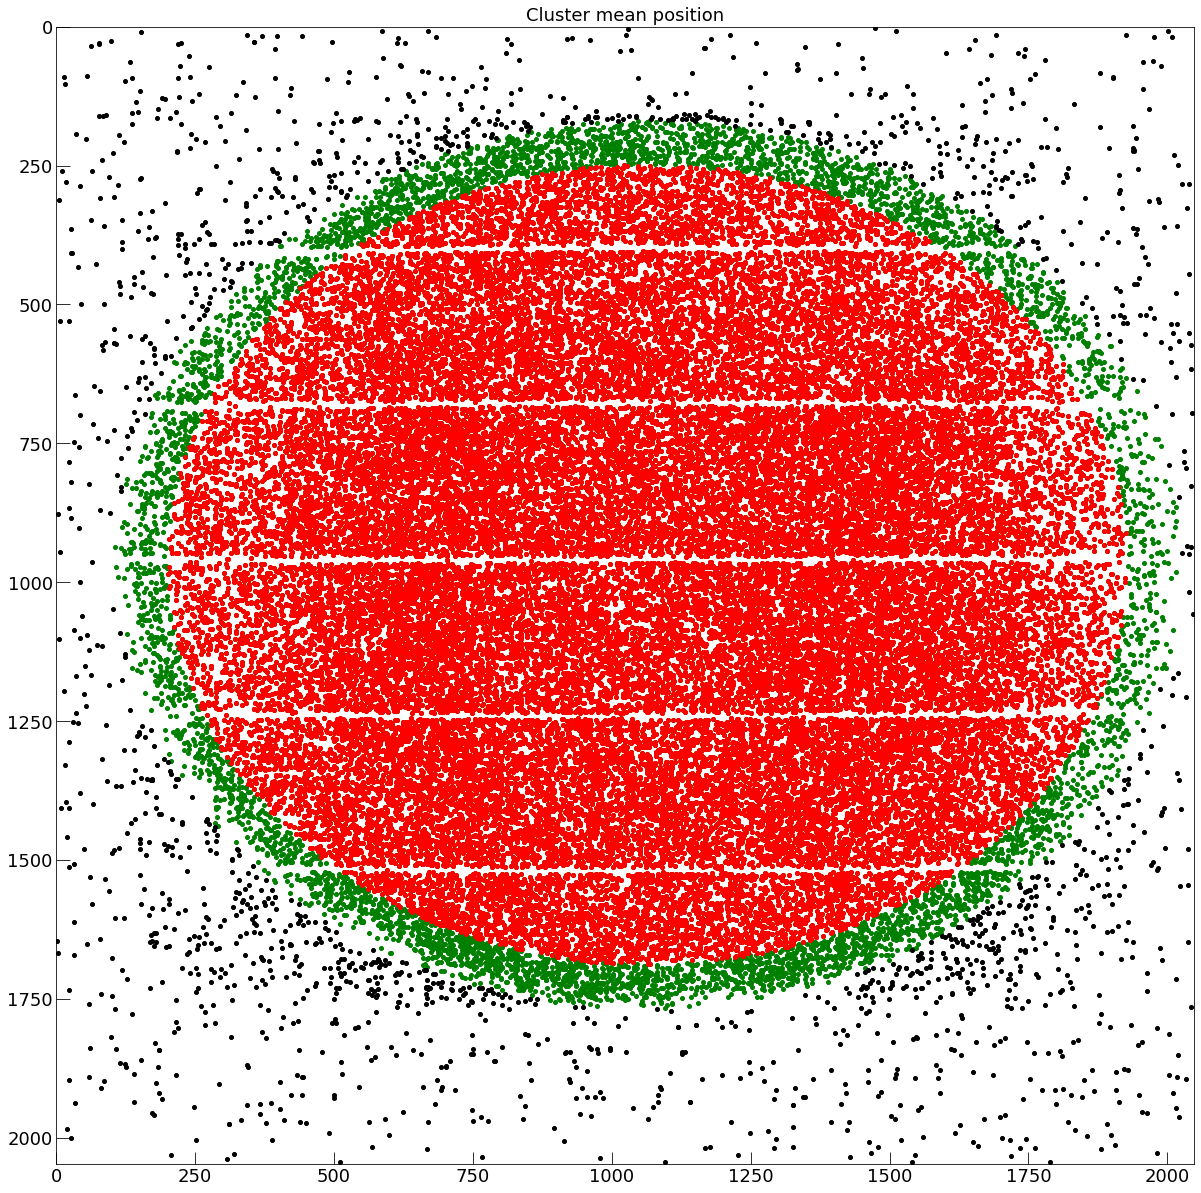

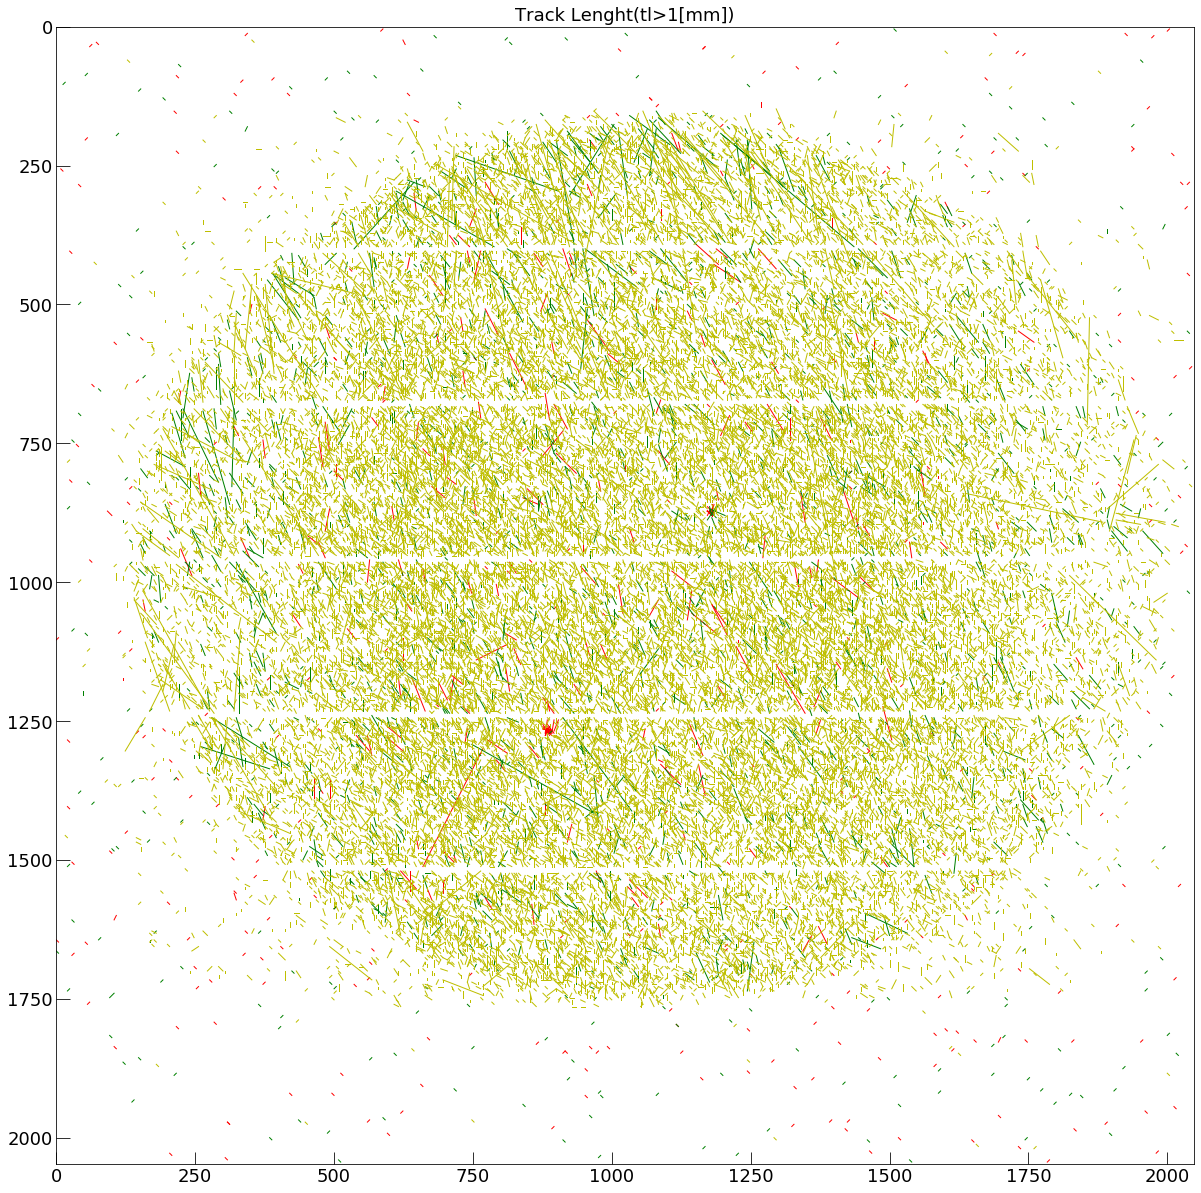

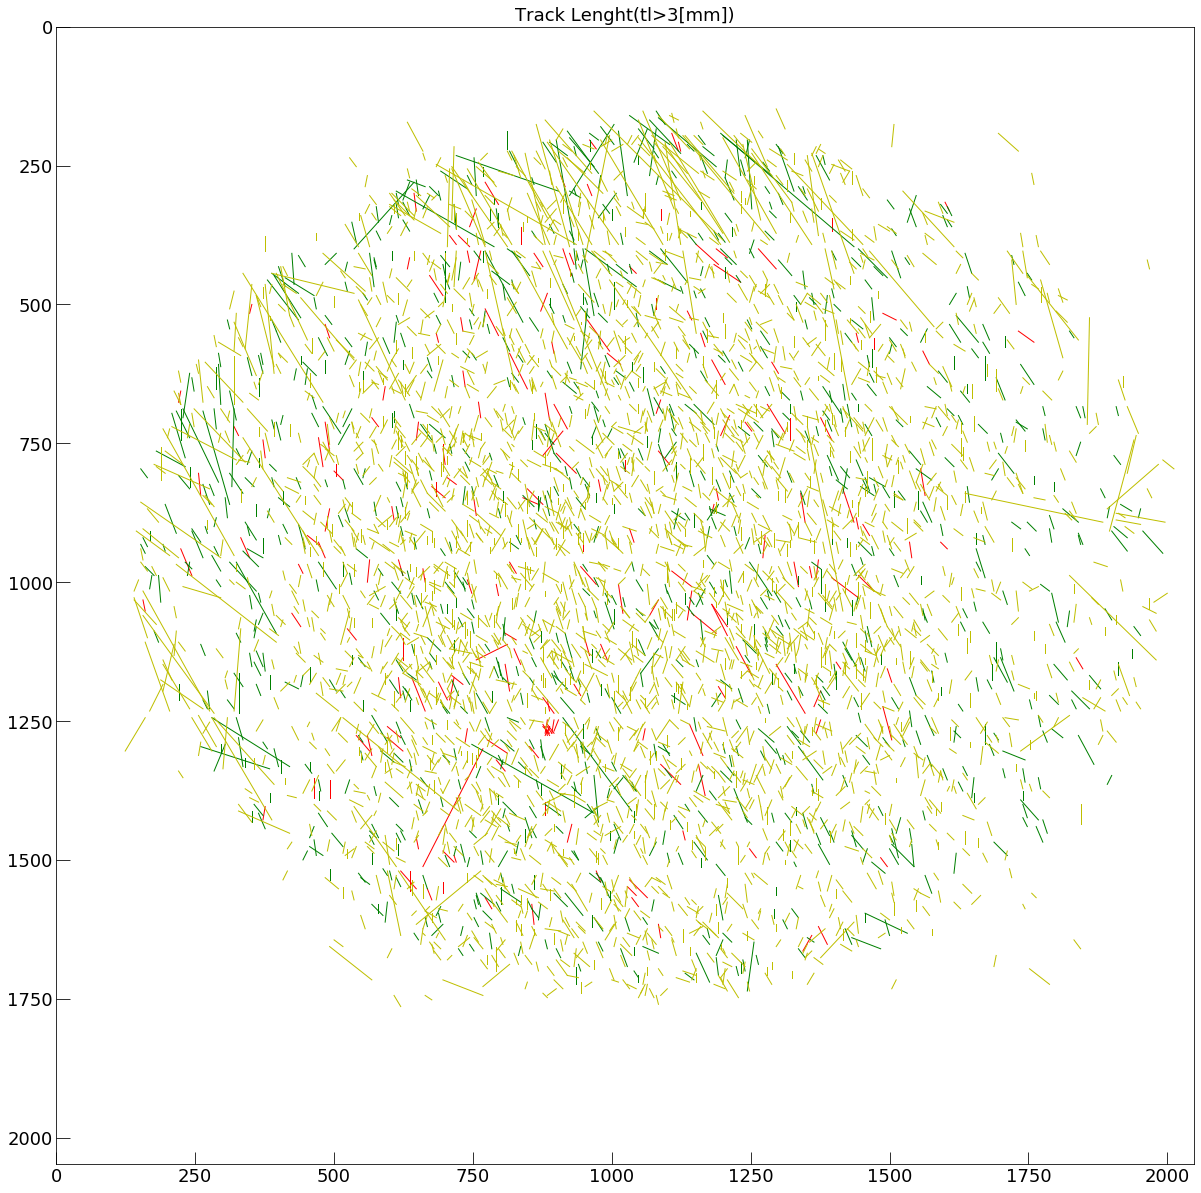

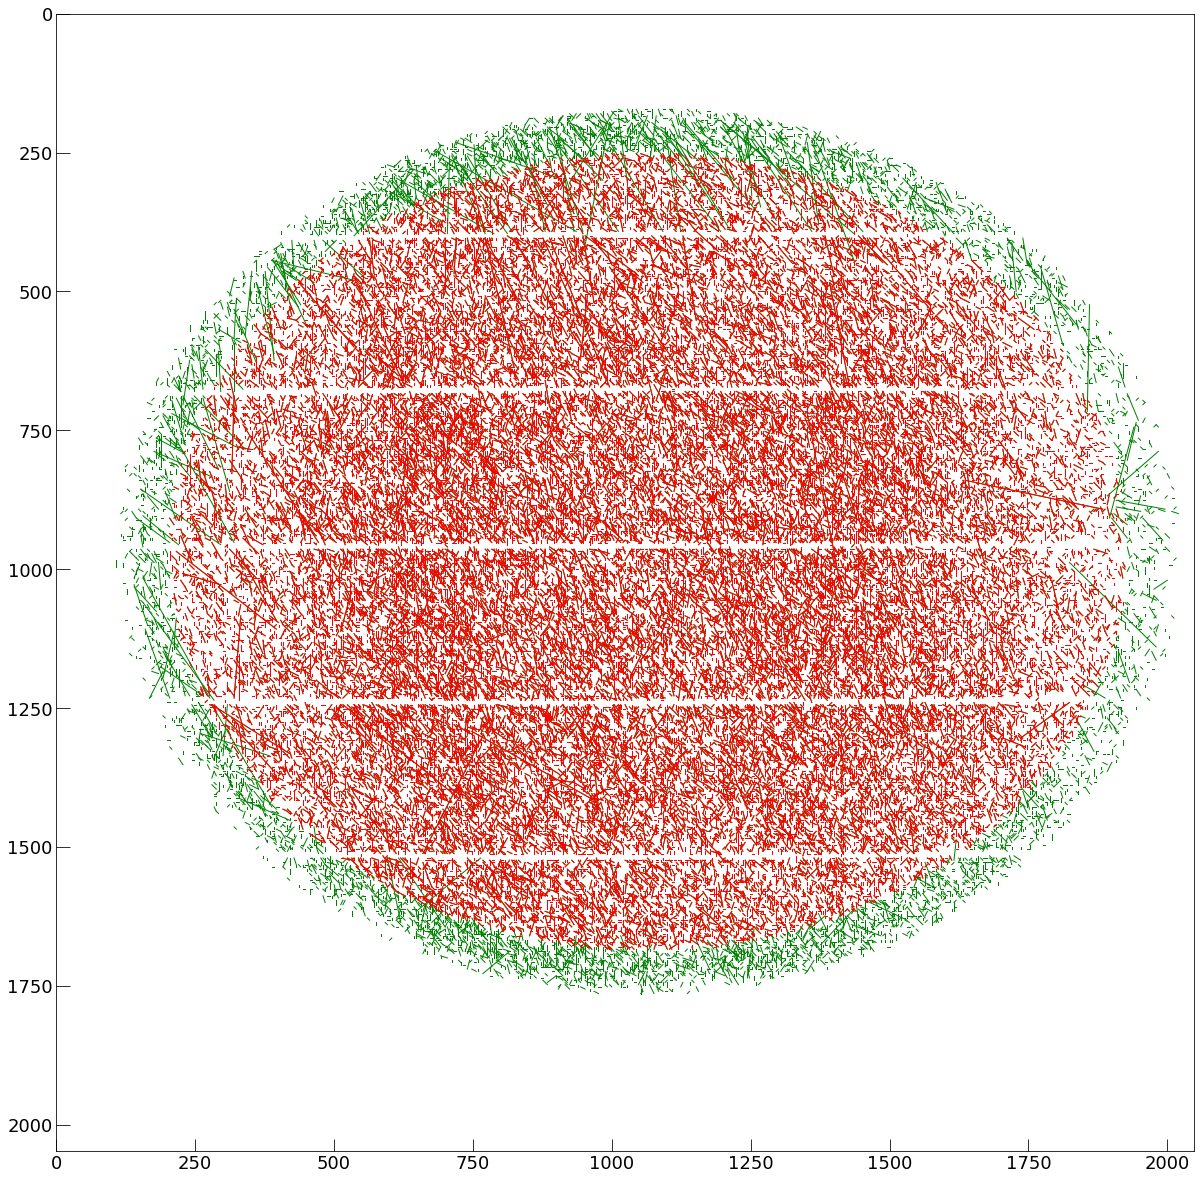

In [200]:
my.set_atlas_style('large')
#
# iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)
# ddx (10), ddy(11), x0start(12), y0start(13), x0end(14), y0end (15)
pixelsize = 0.125
x = np.array(data[:,6])
y = np.array(data[:,8])
pixel    = np.array(data[:,4])
xps        = np.array(data[:,12])
yps        = np.array(data[:,13])
xpe        = np.array(data[:,14])
ype        = np.array(data[:,15])
lpp        = (np.array(data[:,2])-np.array(data[:,3]))/ np.array(data[:,4])

pixelsize = 0.125
DX = -5
DY = 7
a = 120
b = 100
l         =  np.sqrt(np.array(data[:,10])**2+np.array(data[:,11])**2)*pixelsize

print ("ellisse: %.2f, %.2f [mm]" % (a,b))

#from mpl_toolkits.mplot3d import Axes3D
#
##z = lpp/(0.1*1000)
#z = x*y
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.scatter(x, y, z, c='b', marker='.')
#plt.xlim(0,x_resolution)
#plt.ylim(y_resolution,0)
##plt.zlim(0,x_resolution)
#plt.show()

a0 = a*0.9
b0 = b*0.9
##### plot dei centri cluster nell'ellisse 
plt.plot(x[((x-1024)*pixelsize+DX)**2/a**2  + ((y-1024)*pixelsize+DY)**2/b**2<1],
         y[((x-1024)*pixelsize+DX)**2/a**2  + ((y-1024)*pixelsize+DY)**2/b**2<1], "g.")
plt.plot(x[((x-1024)*pixelsize+DX)**2/a0**2 + ((y-1024)*pixelsize+DY)**2/b0**2<1],
         y[((x-1024)*pixelsize+DX)**2/a0**2 + ((y-1024)*pixelsize+DY)**2/b0**2<1], "r.")
plt.plot(x[((x-1024)*pixelsize+DX)**2/a**2  + ((y-1024)*pixelsize+DY)**2/b**2>=1],
         y[((x-1024)*pixelsize+DX)**2/a**2  + ((y-1024)*pixelsize+DY)**2/b**2>=1], "k.")
plt.title("Cluster mean position")
plt.xlim(0,x_resolution)
plt.ylim(y_resolution,0)
plt.show()
# #######

plt.plot([xps[(lpp>15)  & (l>1)], xpe[(lpp>15) & (l>1)]], 
         [yps[(lpp>15)  & (l>1)], ype[(lpp>15) & (l>1)]], "r-")
plt.plot([xps[(lpp>10)  & (lpp<=15) & (l>1)], xpe[(lpp>10) & (lpp<=15) & (l>1)]], 
         [yps[(lpp>10)  & (lpp<=15) & (l>1)], ype[(lpp>10) & (lpp<=15) & (l>1)]], "g-")
plt.plot([xps[(lpp<=10) & (l>1)], xpe[(lpp<=10) & (l>1)]], 
         [yps[(lpp<=10) & (l>1)], ype[(lpp<=10) & (l>1)]], "y-")
plt.title("Track Lenght(tl>1[mm])")
plt.xlim(0,x_resolution)
plt.ylim(y_resolution,0)
plt.show()

##### inization and lenght cut
plt.plot([xps[(lpp>15)  & (l>3)], xpe[(lpp>15) & (l>3)]], 
         [yps[(lpp>15)  & (l>3)], ype[(lpp>15) & (l>3)]], "r-")
plt.plot([xps[(lpp>10)  & (lpp<=15) & (l>3)], xpe[(lpp>10) & (lpp<=15) & (l>3)]], 
         [yps[(lpp>10)  & (lpp<=15) & (l>3)], ype[(lpp>10) & (lpp<=15) & (l>3)]], "g-")
plt.plot([xps[(lpp<=10) & (l>3)], xpe[(lpp<=10) & (l>3)]], 
         [yps[(lpp<=10) & (l>3)], ype[(lpp<=10) & (l>3)]], "y-")
plt.title("Track Lenght(tl>3[mm])")
plt.xlim(0,x_resolution)
plt.ylim(y_resolution,0)
plt.show()
#######


####### fiducializzazione
xpsc = xps[(((xps-1024)*pixelsize+DX)**2/a**2  + ((yps-1024)*pixelsize+DY)**2/b**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a**2  + ((ype-1024)*pixelsize+DY)**2/b**2<1)]
xpec = xpe[(((xps-1024)*pixelsize+DX)**2/a**2  + ((yps-1024)*pixelsize+DY)**2/b**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a**2  + ((ype-1024)*pixelsize+DY)**2/b**2<1)]
ypsc = yps[(((xps-1024)*pixelsize+DX)**2/a**2  + ((yps-1024)*pixelsize+DY)**2/b**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a**2  + ((ype-1024)*pixelsize+DY)**2/b**2<1)]
ypec = ype[(((xps-1024)*pixelsize+DX)**2/a**2  + ((yps-1024)*pixelsize+DY)**2/b**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a**2  + ((ype-1024)*pixelsize+DY)**2/b**2<1)]
plt.plot([xpsc,xpec], [ypsc,ypec], "g-")
##########
xpsc = xps[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
xpec = xpe[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
ypsc = yps[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
ypec = ype[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
           (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
plt.plot([xpsc,xpec], [ypsc,ypec], "r-")

plt.xlim(0,x_resolution)
plt.ylim(y_resolution,0)
plt.show()

# de/dx

ellisse: 120.00, 100.00 [mm]
volume fiduciale: 108.00, 90.00 [mm]


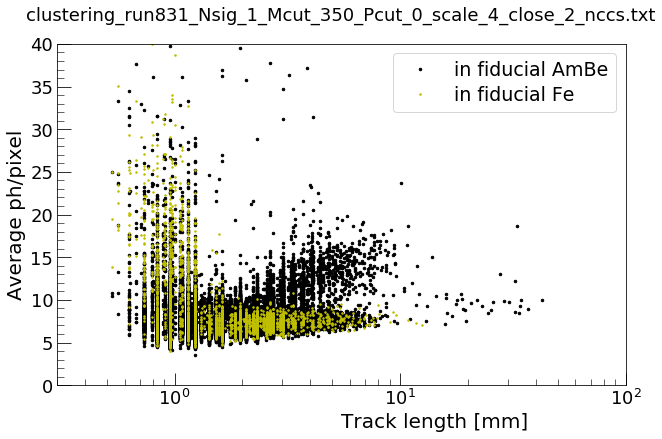

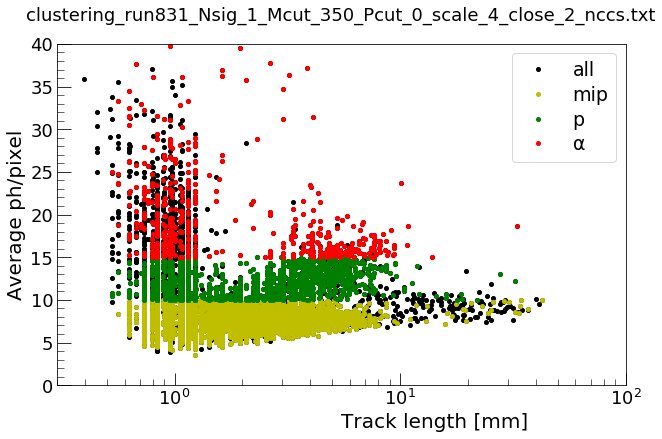

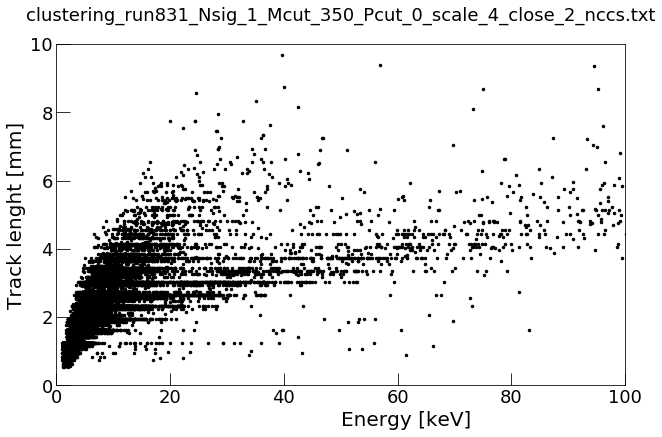

In [201]:
my.set_atlas_style('large')
#
# iTr (0), TrOk (1), SumLight (2), SumBck (3), SumPixel (4), pClose (5), x0m (6), x0s (7), y0m (8), y0s (9)
# ddx (10), ddy(11), x0start(12), y0start(13), x0end(14), y0end (15)

my.set_atlas_style()
pixelsize = 0.125
DX = -5
DY = 7
a = 120
b = 100

print ("ellisse: %.2f, %.2f [mm]" % (a,b))

a0 = a*0.9
b0 = b*0.9

print ("volume fiduciale: %.2f, %.2f [mm]" % (a0,b0))

lp        =  (np.array(data[:,2])-np.array(data[:,3]))/ np.array(data[:,4])
l         =  np.sqrt(np.array(data[:,10])**2+np.array(data[:,11])**2)*pixelsize
s         =  np.array(data[:,11])/np.array(data[:,10])

xp        = np.array(data[:,6])
yp        = np.array(data[:,8])
xps        = np.array(data[:,12])
yps        = np.array(data[:,13])
xpe        = np.array(data[:,14])
ype        = np.array(data[:,15])

pixel     = np.array(data[:,4])

x = l
y = lp
#plt.plot(x,y, 'k.', label="all data")

# fiducializza solo il punto medio del cluster e non la tracca
#x0=x0[((xp-1024)*pixelsize+DX)**2/a0**2+((yp-1024)*pixelsize+DY)**2/b0**2<1] 
#y0=y0[((xp-1024)*pixelsize+DX)**2/a0**2+((yp-1024)*pixelsize+DY)**2/b0**2<1] 
#l = l[((xp-1024)*pixelsize+DX)**2/a0**2+((yp-1024)*pixelsize+DY)**2/b0**2<1] 
#s = s[((xp-1024)*pixelsize+DX)**2/a0**2+((yp-1024)*pixelsize+DY)**2/b0**2<1]

### fiducializza in base alla posizione minima e massima del cluster

y = lp[(((xps-1024)*pixelsize+DX)**2/a**2  + ((yps-1024)*pixelsize+DY)**2/b**2<1) & 
      (((xpe-1024)*pixelsize+DX)**2/a**2  + ((ype-1024)*pixelsize+DY)**2/b**2<1)] 
x = l[(((xps-1024)*pixelsize+DX)**2/a**2  + ((yps-1024)*pixelsize+DY)**2/b**2<1) & 
      (((xpe-1024)*pixelsize+DX)**2/a**2  + ((ype-1024)*pixelsize+DY)**2/b**2<1)]
#plt.plot(x,y, 'g.', label="in field cage",  markersize=5)

yf = lp[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
        (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)] 
xf = l[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
       (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
plt.plot(xf,yf, 'k.', label="in fiducial AmBe",  markersize=5)


xpsFe        = np.array(dataFe[:,12])
ypsFe        = np.array(dataFe[:,13])
xpeFe        = np.array(dataFe[:,14])
ypeFe        = np.array(dataFe[:,15])

yFe        = (np.array(dataFe[:,2])-np.array(dataFe[:,3]))/ np.array(dataFe[:,4])
dFe        = np.sqrt(np.array(dataFe[:,10])**2+np.array(dataFe[:,11])**2)*pixelsize

yfFe = yFe[(((xpsFe-1024)*pixelsize+DX)**2/a0**2  + ((ypsFe-1024)*pixelsize+DY)**2/b0**2<1) & 
           (((xpeFe-1024)*pixelsize+DX)**2/a0**2  + ((ypeFe-1024)*pixelsize+DY)**2/b0**2<1)] 
xfFe = dFe[(((xpsFe-1024)*pixelsize+DX)**2/a0**2  + ((ypsFe-1024)*pixelsize+DY)**2/b0**2<1) & 
           (((xpeFe-1024)*pixelsize+DX)**2/a0**2  + ((ypeFe-1024)*pixelsize+DY)**2/b0**2<1)] 

plt.plot(dFe,yFe, 'y.', label="in fiducial Fe", markersize=3)

plt.ylim((0, 40))
plt.xscale('log')
plt.xlim((0.3, 100))
plt.xlabel(r'Track length [mm]', horizontalalignment = 'left')
plt.ylabel(r'Average ph/pixel')
plt.minorticks_on()
plt.title(fname, y=1.05)
plt.legend()
plt.show()

### tagli in fotoni

x = l
y = lp
plt.plot(x,y, 'k.', label="all")

y=yf[(yf<10)]
x=xf[(yf<10)]
plt.plot(x,y, 'y.', label="mip")

y=yf[(yf>=10) & (yf<15)]
x=xf[(yf>=10) & (yf<15)]
plt.plot(x,y, 'g.', label="p")

y=yf[(yf>=15)]
x=xf[(yf>=15)]
plt.plot(x,y, 'r.', label=(r"$\alpha$"))

plt.ylim((0, 40))
plt.xscale('log')
plt.xlim((0.3, 100))

plt.xlabel(r'Track length [mm]', horizontalalignment = 'left')
plt.ylabel(r'Average ph/pixel')
plt.minorticks_on()
plt.title(fname, y=1.05)
plt.legend(loc=1)
plt.show()

#y=yf[(xf>2) & (yf<30)]
#x=xf[(yf>=10) & (xf>1)]
en = (np.array(data[:,2])-np.array(data[:,3]))/(0.06*1000)
tl =  np.sqrt(np.array(data[:,10])**2+np.array(data[:,11])**2)*pixelsize
en = en[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
        (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)] 
tl = tl[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
       (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
plt.plot(en,tl, 'k.', label="in fiducial AmBe",  markersize=5)
#plt.yscale('log')
#plt.xscale('log')
plt.ylim((0, 10))
plt.xlim((0, 100))

plt.xlabel(r'Energy [keV]', horizontalalignment = 'left')
plt.ylabel(r'Track lenght [mm]')
plt.title(fname, y=1.05)
plt.show()

In [202]:
lp =[]
tl =[]
xps=[]
yps=[]
xpe=[]
ype=[]
########## LOAD FILE 
fname = 'clustering_run740_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'
data740 = np.loadtxt(("./data/%s" % fname), 
                    delimiter=" ")
#
########## LOAD FILE 
fname = 'clustering_run741_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'
data741 = np.loadtxt(("./data/%s" % fname), 
                    delimiter=" ")
#
########## LOAD FILE 
fname = 'clustering_run742_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'
data742 = np.loadtxt(("./data/%s" % fname), 
                    delimiter=" ")
#
lp740  =  (np.array(data740[:,2])-np.array(data740[:,3]))/ (np.array(data740[:,4])*0.10)
tl740  =  np.sqrt(np.array(data740[:,10])**2+np.array(data740[:,11])**2)*pixelsize
lp741  =  (np.array(data741[:,2])-np.array(data741[:,3]))/ (np.array(data741[:,4])*0.11)
tl741  =  np.sqrt(np.array(data741[:,10])**2+np.array(data741[:,11])**2)*pixelsize
lp742  =  (np.array(data742[:,2])-np.array(data742[:,3]))/ (np.array(data742[:,4])*0.12)
tl742  =  np.sqrt(np.array(data742[:,10])**2+np.array(data742[:,11])**2)*pixelsize
xps740 = np.array(data740[:,12])
yps740 = np.array(data740[:,13])
xpe740 = np.array(data740[:,14])
ype740 = np.array(data740[:,15])
xps741 = np.array(data741[:,12])
yps741 = np.array(data741[:,13])
xpe741 = np.array(data741[:,14])
ype741 = np.array(data741[:,15])
xps742 = np.array(data742[:,12])
yps742 = np.array(data742[:,13])
xpe742 = np.array(data742[:,14])
ype742 = np.array(data742[:,15])

lp.extend(lp740)
lp.extend(lp741)
lp.extend(lp742)
np.size(lp)
tl.extend(tl740)
tl.extend(tl741)
tl.extend(tl742)
xps.extend(xps740)
yps.extend(yps740)
xpe.extend(xpe740)
ype.extend(ype740)
xps.extend(xps741)
yps.extend(yps741)
xpe.extend(xpe741)
ype.extend(ype741)
xps.extend(xps742)
yps.extend(yps742)
xpe.extend(xpe742)
ype.extend(ype742)
yf = lp[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
     (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)] 
xf = tl[(((xps-1024)*pixelsize+DX)**2/a0**2  + ((yps-1024)*pixelsize+DY)**2/b0**2<1) & 
      (((xpe-1024)*pixelsize+DX)**2/a0**2  + ((ype-1024)*pixelsize+DY)**2/b0**2<1)]
plt.plot(tl,lp, 'k.', label="all")
plt.plot(xf,yf, 'g.', label="all")
plt.ylim((0, 500))
plt.xscale('log')
plt.xlim((0.3, 500))
plt.xlabel(r'Track length [mm]', horizontalalignment = 'left')
plt.ylabel(r'Average ph/pixel')
plt.minorticks_on()
plt.title("comulative 740/741/742", y=1.05)
plt.show()
##print(lp740)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

# Fe background distributon for a given cluster size

In [ ]:
my.set_atlas_style()
#iTr, TrOk, SumLight, SumBck, SumPixel, pClose, x0m, x0s, y0m, y0s
norm    = np.array(data[:,5])
#y       = np.array(data[:,3]/norm)
#y1      = np.array(data[:,2]/norm)
y       = np.array(data[:,3])
y1      = np.array(data[:,2])

cut      = np.array(data[:,4])
#y = y[(cut>40) & (cut<80)]
y=y[(y<8000)] ##WARNING###
y1=y1[(y1<14000)]
gauss = False
polya = False
bin_size = 1
bins = int(y.size/bin_size)
plt.hist(y, bins=bins, color='gray', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.hist(y1, bins=bins, color='red', alpha=0.4,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y1.size, y1.mean(), y1.std()))
#plt.xlim((0, 300))
if gauss or polya:
    cmin    =  3140 # 7830 #12600# 6300 # 6280 25270 # #
    cmax    =  3185 #7970 #12900#6400 # 635925500 #1610 #
    
    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
    plt.errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()
    if gauss:
        popt, pcov = curve_fit(my.Gauss3, x, yh, 
                              sigma=ye,
                              absolute_sigma=True,
                              p0=(A, M, S))
        xf = np.linspace(cmin, cmax, 100)
        plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                      (popt[0], popt[1], popt[2]))
    cmin    = 3240  # 6800 25770 #1610 #
    cmax    = 3400 # 7100 26300 #1650 #
    
    binf = int(bins*(cmax-cmin)/(y1.max()-y1.min()))
    yh, bins_edge = np.histogram(y1, binf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
    plt.errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y1.mean(), y1.std()    
    if polya:
        alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y1[(y1>cmin) & (y1<cmax)])  
        pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
        plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'k-', 
                 label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))


#plt.yscale('log')
plt.xlim((7000, 8000))
#plt.xlim((12000, 14000))
#plt.ylim((0, 2000))
plt.xlabel(r'Photons in cluster signal/background')
plt.ylabel(r'Counts')
plt.minorticks_on()
plt.title(fname)
plt.legend(loc=1)
plt.show()
if gauss and polya:
    dist = stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma)-popt[1]
    print (dist, stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma/dist))

In [127]:
LEMON=3.165e3
ORANGE = 3.156e3
bck = np.array(data[:,3])-(3.168e3/2.)*np.array(data[:,5])
np.mean(bck)

21.674763396537482

In [130]:
# fa un cut sulla cluster size (0,20)
nloop = 0
Alight = []
Aback  = []
pixelOK = []
print ("all data: %d" % len(data))
valmp = 3.168e3/2.
while True:
    csize    = data[nloop,5]
    pixel    = data[nloop,4]
    bck      = np.float(data[nloop,3])
    light    = np.float(data[nloop,2])
    
    bcktmp    = bck-valmp*(csize)
    lighttmp  = light-valmp*(csize)
    if 40 < pixel < 300:            #LEMON 40:300 ORANGE 400:850
        Alight.append([lighttmp])
        Aback.append([bcktmp])
        pixelOK.append([pixel])
    nloop+=1
    if nloop == len(data):
        break
print ("selected data: %d" % len(Alight))

all data: 6065
selected data: 1373


/opt/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in divide


1.9138849242436264 224.98444419585144 170.58359855958736


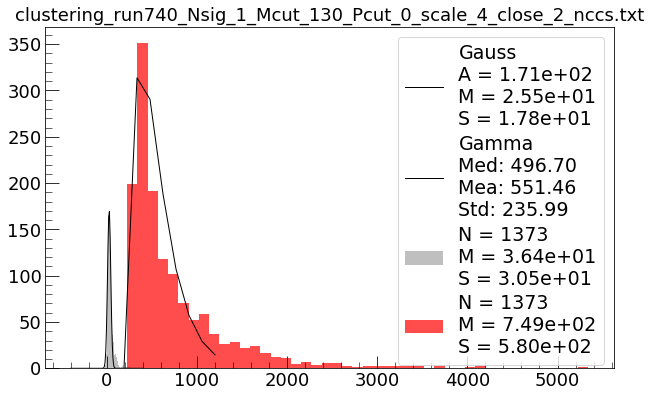

(525.9630513740403, 0.44868334231338514)


In [131]:
my.set_atlas_style()
y        = np.array(Aback)
y1       = np.array(Alight)

bin_size = 30
bins = int(y.size/bin_size)
plt.hist(y, bins=bins, color='gray', alpha=0.5,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y.size, y.mean(), y.std()))
plt.hist(y1, bins=bins, color='red', alpha=0.7,
                   label='N = %d\nM = %.2e\nS = %.2e' % 
                   (y1.size, y1.mean(), y1.std()))

gauss = True
polya = True
if gauss or polya:
    cmin    =  -400
    cmax    =  +400
    
    binf = int(bins*(cmax-cmin)/(y.max()-y.min()))
    yh, bins_edge = np.histogram(y, binf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
#    plt.errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()
    if gauss:
        popt, pcov = curve_fit(my.Gauss3, x, yh, 
                              sigma=ye,
                              absolute_sigma=True,
                              p0=(A, M, S))
        xf = np.linspace(cmin, cmax, 100)
        plt.plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                      (popt[0], popt[1], popt[2]))
    cmin    = 190 #5000 # 300  
    cmax    = 1200 #15000 # 2000
    
    binf = int(bins*(cmax-cmin)/(y1.max()-y1.min()))
    yh, bins_edge = np.histogram(y1, binf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binf)
    ye      = 1/np.sqrt(yh)
#    plt.errorbar(x, yh, ye, fmt="k.")
#    plt.plot(x, yh, "k.")
    A, M, S = yh.max(), y1.mean(), y1.std()    
    if polya:
        alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y1[(y1>cmin) & (y1<cmax)])  
        print alpha_gamma, loc_gamma, scale_gamma
#        alpha_gamma, loc_gamma, scale_gamma = 8., 43., 77.
        pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, scale_gamma)  
        plt.plot(x, pdf_gamma*sum_yh*np.diff(bins_edge)[0], 'k-', 
                 label=("Gamma\nMed: %.2f\nMea: %.2f\nStd: %.2f" % 
                (stats.gamma.median(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma), 
                 stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma))))
#plt.xlim((-200,2500))
#plt.ylim((0,100))
plt.minorticks_on()
plt.title(fname)
plt.legend(loc=1)
plt.show()
if gauss and polya:
    dist = stats.gamma.mean(alpha_gamma, loc_gamma, scale_gamma)-popt[1]
    print (dist, stats.gamma.std(alpha_gamma, loc_gamma, scale_gamma/dist))

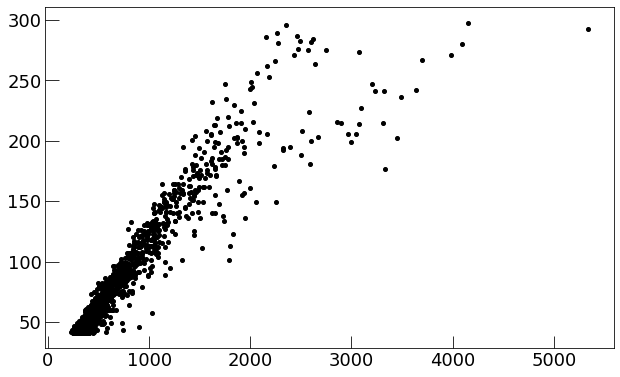

In [132]:
my.set_atlas_style()
import seaborn as sns
#iTr, TrOk, SumLight, SumBck, SumPixel, pClose, x0m, x0s, y0m, y0s
x        = np.array(Alight)
y        = np.array(pixelOK)
#plt.hist2d(x, y, bins=(100, 100), cmap=plt.cm.jet)
#sns.kdeplot((x, y), x*y, cmap="Reds", shade=True, bw=.15)
plt.plot(x,y, 'k.')

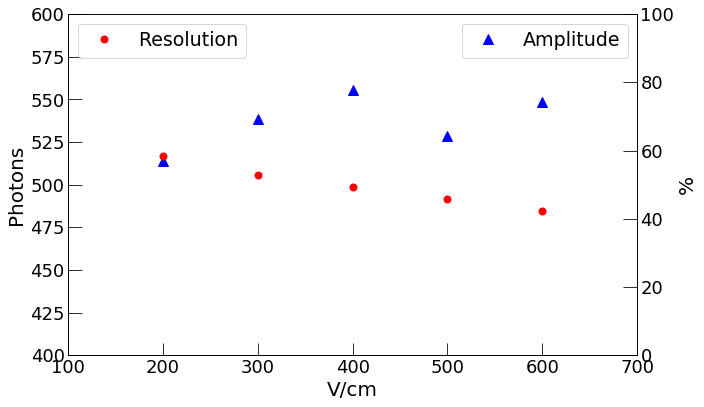

In [60]:
#### OLD DATA ###
# @ 15 com
# y = np.array([214.87, 207.29, 213.76, 204.79, 201.42])
# y1 = np.array([0.26, 0.27, 0.27, 0.30, 0.33])
# @ 3 cm
# y = np.array([265.34, 267.40, 275.82, 283.51, 285.70])
# y1 = np.array([0.22, 0.22, 0.22, 0.22, 0.22])
##################

x = np.array([600, 500, 400, 300, 200])
# @ 15 com
y = np.array([548.37, 528.43, 555.76, 538.35, 513.91])
y1 = np.array([231.96, 242.26, 274.24, 284.96, 300.75])
# @ 3 cm
#y = np.array([573.82, 605.5, 629.51, 694.01, 725.48])
#y1 = np.array([194.19, 202.81, 206.51, 233.55, 245.63])
fig, ax = plt.subplots()
ax.set_xlabel('V/cm')
ax.set_ylabel('Photons')
ax.plot(x,y, 'b^', markersize=10, label='Amplitude')
ax.set_ylim((400, 600))
ax.legend(loc=1)
ax = ax.twinx()
ax.set_ylabel('%')
ax.plot(x,(y1/y)*100, 'r.', markersize=14, label='Resolution')
ax.set_ylim((0., 100))
ax.set_xlim((100, 700))
ax.legend(loc=2)
plt.show()

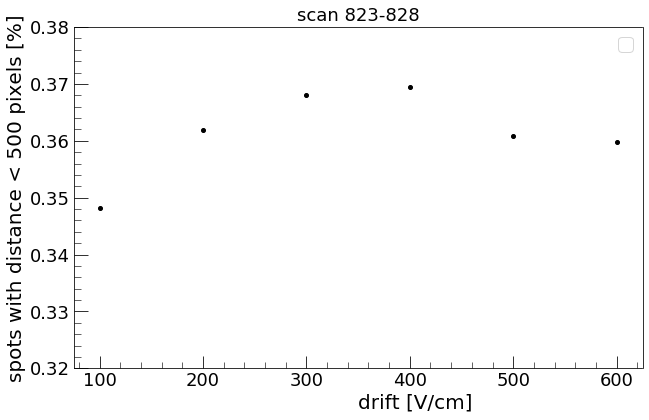

In [130]:
my.set_atlas_style()
eff = [[600, 3852, 1386],
    [500, 3905., 1409.],
    [400, 3794., 1402.],
    [300, 3662., 1348.],
    [200, 3374., 1221.],
    [100, 2734., 952.]]
eff = np.array(eff)
plt.plot(eff[:,0], eff[:,2]/eff[:,1], "k.")
#plt.plot(eff[:,0], eff[:,2], "k.")
plt.title("scan 823-828")
plt.minorticks_on()
plt.xlabel(r'drift [V/cm]', horizontalalignment = 'left')
plt.ylabel(r'spots with distance < 500 pixels [%]')
plt.ylim(0.32, 0.38)
plt.legend()
plt.show()

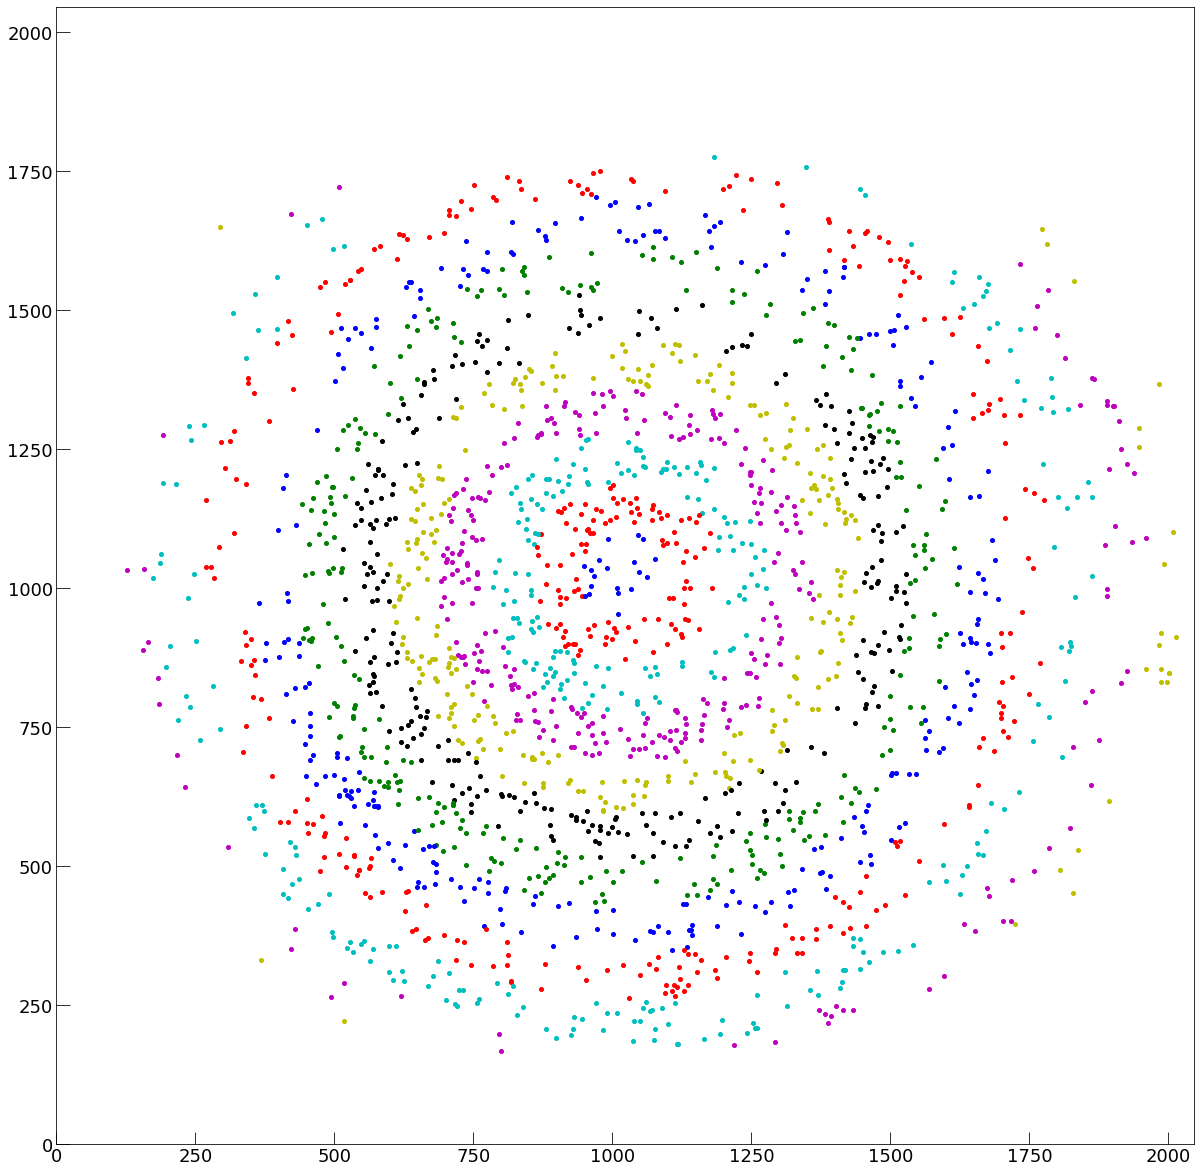

In [121]:
my.set_atlas_style('large')
x = np.array(data[:,6])
y = np.array(data[:,8])
pixel    = np.array(data[:,4])
x         = x[(pixel>30) & (pixel<300)]
y         = y[(pixel>30) & (pixel<300)]
col    = ('b.', 'r.', 'c.', 'm.', 'y.', 'k.', 'g.', 'b.', 'r.', 'c.', 'm.', 'y.', 'k.', 'g.')
#print (x.size, x[((x-1024)**+(y-1024)**2)<500].size, x[((x-1024)**+(y-1024)**2)<300].size)
for i in range(0, x.size):
    for r in range (0, 12):
        radin = int(r*85.3) 
        radout = int((r+1)*85.3)
        #print (radin, radout, np.sqrt((x[i]-1024)**2+(y[i]-1024)**2))
        if (x[i]-1024)**2+(y[i]-1024)**2>radin**2 and (x[i]-1024)**2+(y[i]-1024)**2<=radout**2:
            plt.plot(x[i],y[i], col[r])
##plt.plot(x,y, "k.")
plt.xlim(0,2046)
plt.ylim(0,2046)
plt.show()

#plt.plot(sx*sy, p, "k.")
#plt.ylim(0,200)
#plt.show()

/opt/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.


(2108, 588, 588)


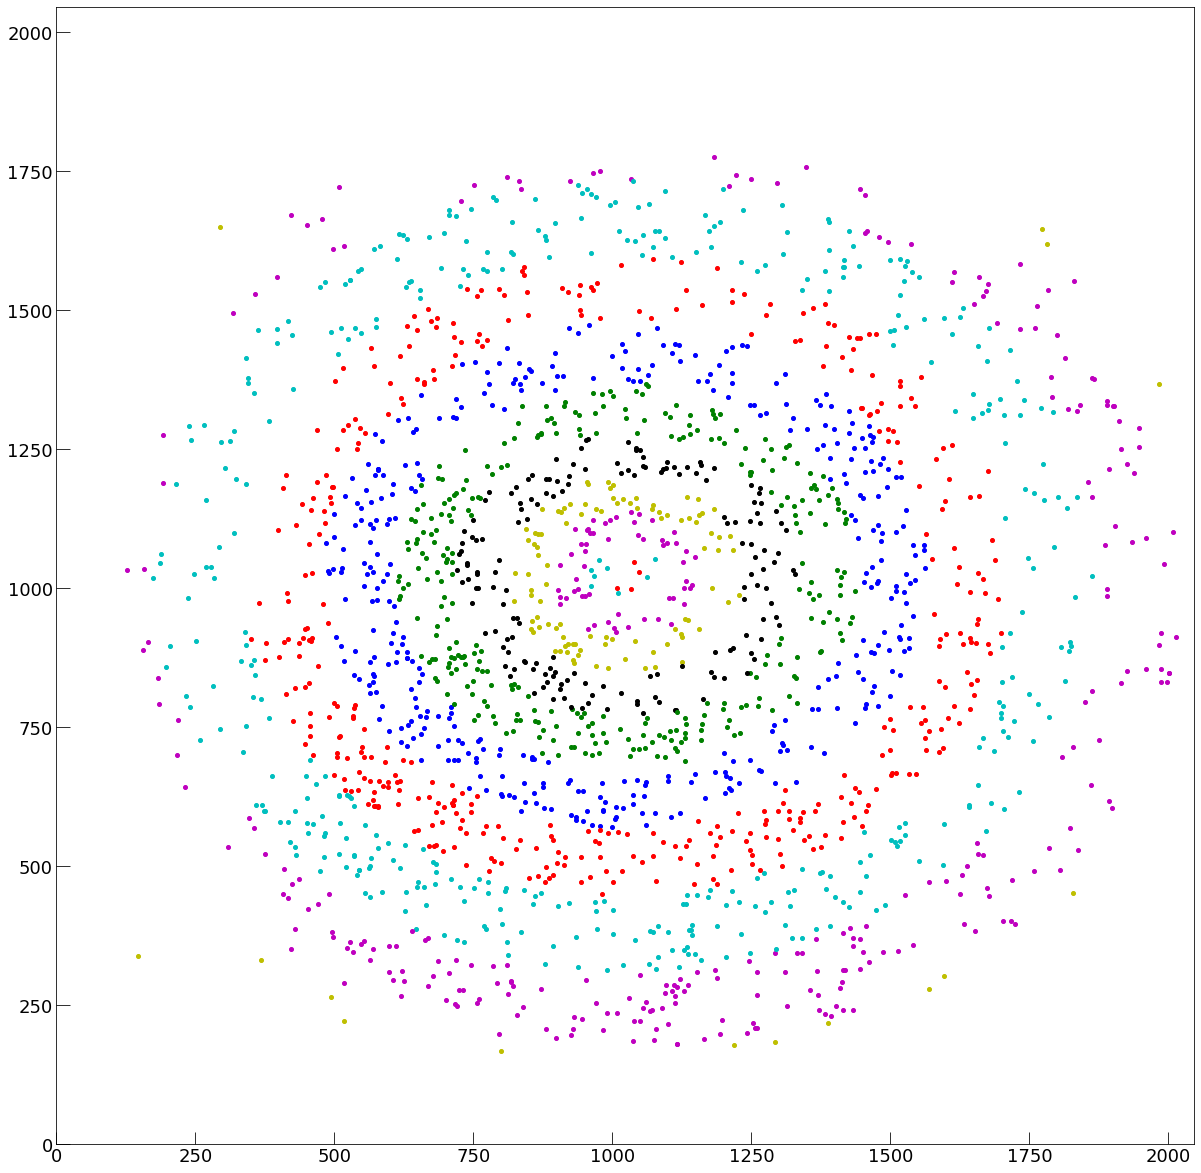

In [84]:
my.set_atlas_style('large')
x = np.array(data[:,6])
y = np.array(data[:,8])
pixel    = np.array(data[:,4])
x         = x[(pixel>30) & (pixel<300)]
y         = y[(pixel>30) & (pixel<300)]
a = 12*85.3
b = 10*85.3
col    = ('b.', 'r.', 'c.', 'm.', 'y.', 'k.', 'g.', 'b.', 'r.', 'c.', 'm.', 'y.', 'k.', 'g.')
print (x.size, x[((x-1024)**+(y-1024)**2)<500].size, x[((x-1024)**+(y-1024)**2)<300].size)
for i in range(0, x.size):
    for r in range (0, 12):
        a0 = b0 = int(r*85.3) 
        a1 = b1 = int((r+1)*85.3)
        #print (radin, radout, np.sqrt((x[i]-1024)**2+(y[i]-1024)**2))
        if ((((x[i]-1024)*b)**2+((y[i]-1024)*a)**2)>(a0*b0)**2) and ((((x[i]-1024)*b)**2+((y[i]-1024)*a)**2)<=(a1*b1)**2):
            plt.plot(x[i],y[i], col[r])

plt.xlim(0,2046)
plt.ylim(0,2046)
plt.show()

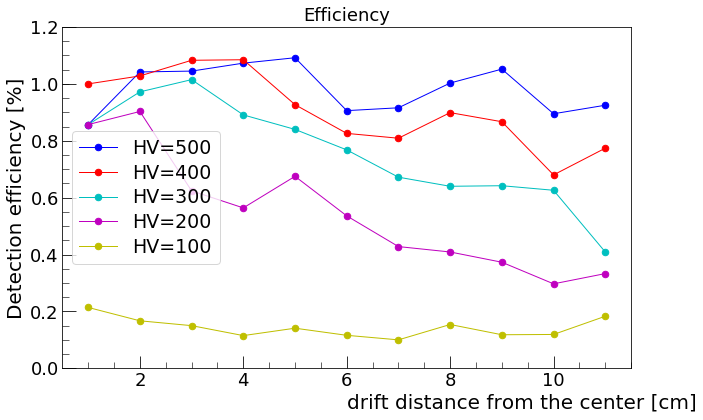

In [123]:
my.set_atlas_style()
col    = ('b.-', 'r.-', 'c.-', 'm.-', 'y.-', 'k.-', 'g.-')
HV = [600,500,400,300,200,100]

HVeff = [[1,0.857,1.000,0.857,0.857,0.214],
         [2,1.042,1.028,0.972,0.903,0.167],
         [3,1.045,1.083,1.015,0.624,0.150],
         [4,1.073,1.085,0.891,0.564,0.115],
         [5,1.092,0.927,0.840,0.675,0.141],
         [6,0.906,0.826,0.768,0.536,0.116],
         [7,0.916,0.809,0.672,0.428,0.100],
         [8,1.003,0.899,0.640,0.409,0.154],
         [9,1.052,0.867,0.642,0.373,0.118],
         [10,0.895,0.680,0.626,0.297,0.119],
         [11,0.925,0.774,0.409,0.333,0.183]]

HVeff = np.array(HVeff)
for ch in range(1, len(HV)):
    plt.plot(HVeff[:,0], HVeff[:,ch], col[ch-1], label=("HV=%d" % (HV[ch])), markersize=13)
    
plt.title("Efficiency")
plt.minorticks_on()
plt.xlabel(r'drift distance from the center [cm]', horizontalalignment = 'left')
plt.ylabel(r'Detection efficiency [%]')
plt.ylim(0., 1.2)
plt.legend()
plt.show()

(4, 9)


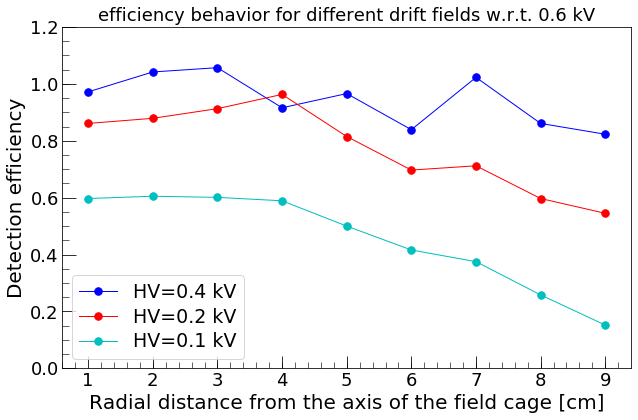

In [80]:
my.set_atlas_style()
col    = ('b.-', 'r.-', 'c.-', 'm.-', 'y.-', 'k.-', 'g.-')
HV = [600,500,400,300,200,100]
HVeff = [[1, 0.750, 0.972, 0.736, 0.861, 0.597],
         [2, 0.963, 1.042, 1.016, 0.879, 0.605],
         [3, 1.125, 1.057, 1.095, 0.913, 0.601],
         [4, 1.054, 0.916, 0.865, 0.963, 0.589],
         [5, 0.939, 0.966, 0.975, 0.815, 0.500],
         [6, 0.899, 0.839, 0.852, 0.697, 0.416],
         [7, 1.112, 1.023, 0.926, 0.712, 0.375],
         [8, 1.013, 0.861, 0.708, 0.597, 0.258],
         [9, 0.854, 0.823, 0.586, 0.545, 0.152]]

HV = [0.6,0.4,0.2,0.1]
HVeff = [[1, 0.972, 0.861, 0.597],
         [2, 1.042, 0.879, 0.605],
         [3, 1.057, 0.913, 0.601],
         [4, 0.916, 0.963, 0.589],
         [5, 0.966, 0.815, 0.500],
         [6, 0.839, 0.697, 0.416],
         [7, 1.023, 0.712, 0.375],
         [8, 0.861, 0.597, 0.258],
         [9, 0.823, 0.545, 0.152]]


HVeff = np.array(HVeff)
print(len(HV), HVeff[:,1].size)
for ch in range(1, len(HV)):
    plt.plot(HVeff[:,0], HVeff[:,ch], col[ch-1], label=("HV=%.1f kV" % (HV[ch])), markersize=15)
    
plt.title("efficiency behavior for different drift fields w.r.t. 0.6 kV")
plt.minorticks_on()
plt.xlabel(r'Radial distance from the axis of the field cage [cm]')
plt.ylabel(r'Detection efficiency')
plt.ylim(0., 1.2)
plt.legend()
plt.show()